In [2]:
import pandas as pd
import seaborn as sns

insurance = pd.read_csv("../Data/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
insurance['charges'].quantile(.995)

50086.98487310009

### Exploring the Target

<Axes: xlabel='charges', ylabel='Count'>

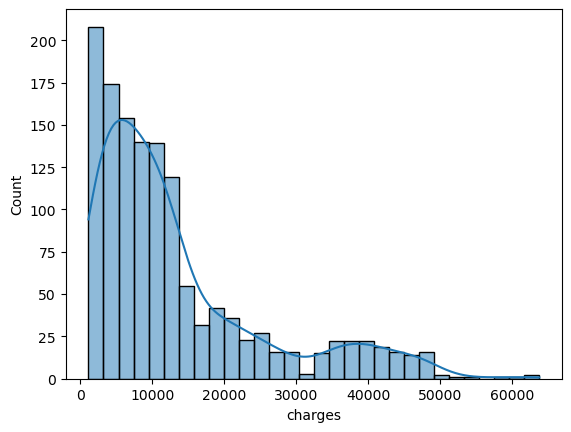

In [7]:
sns.histplot(insurance["charges"], kde=True)

<Axes: xlabel='charges'>

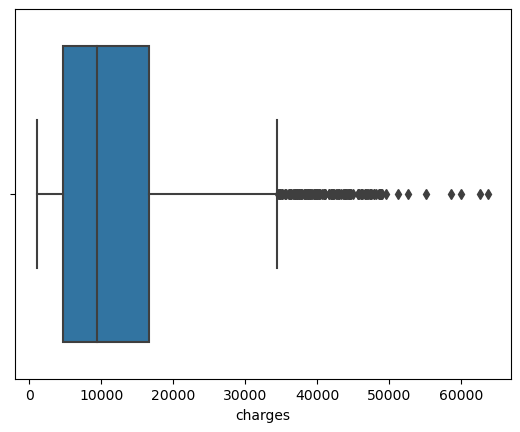

In [11]:
sns.boxplot(x=insurance["charges"])

<Axes: xlabel='charges'>

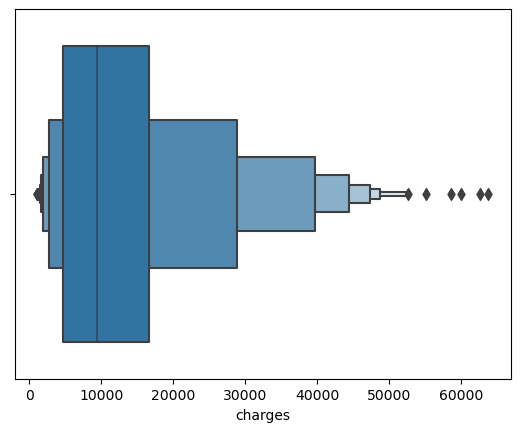

In [10]:
sns.boxenplot(x=insurance["charges"])

<Axes: xlabel='age', ylabel='Count'>

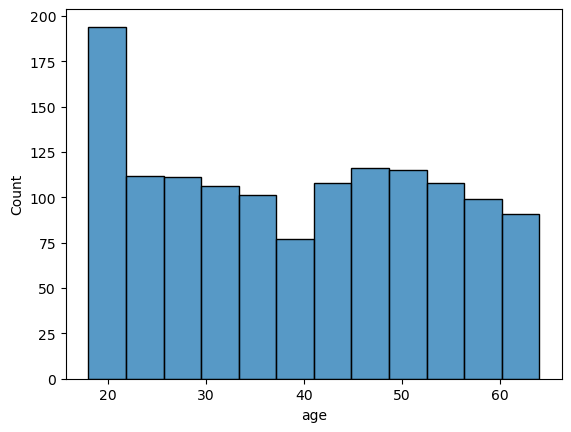

In [15]:
sns.histplot(x=insurance["age"])

<Axes: >

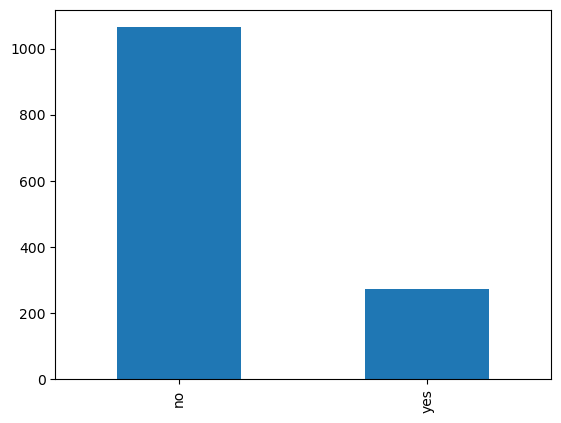

In [49]:
insurance["smoker"].value_counts().plot.bar()

### Linear Relationships

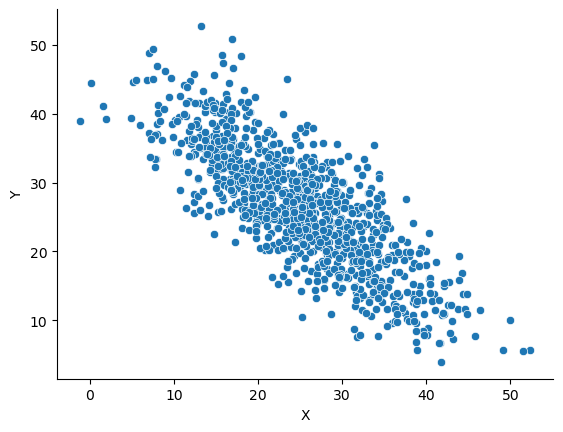

In [26]:
import numpy as np
import seaborn as sns

xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = -.5       # correlation
covs = [
    [stds[0]**2, stds[0]*stds[1]*corr], 
    [stds[0]*stds[1]*corr, stds[1]**2]
] 

m = np.random.multivariate_normal(means, covs, 1000).T

import pandas as pd

df = pd.DataFrame(m).T
df.columns = ["X", "Y"]
df.head()

sns.scatterplot(df, x="X", y="Y")

sns.despine()

<Axes: >

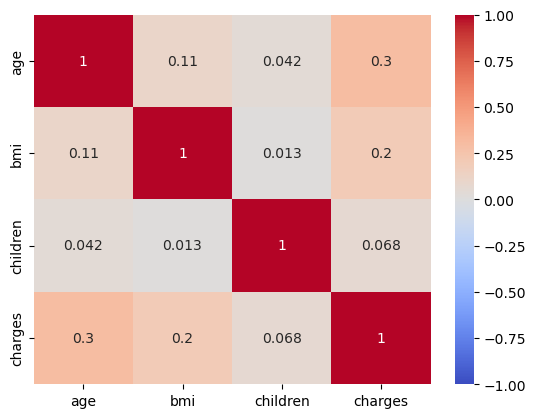

In [43]:
sns.heatmap(insurance.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

### Feature-Target Relationships

<Axes: xlabel='age', ylabel='charges'>

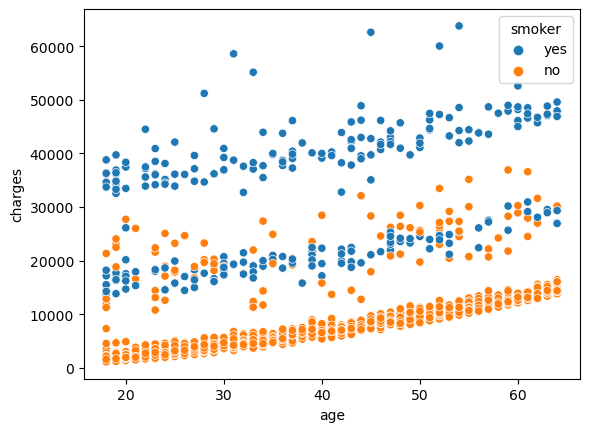

In [57]:
sns.scatterplot(insurance, x="age", y="charges", hue="smoker")

<Axes: xlabel='smoker'>

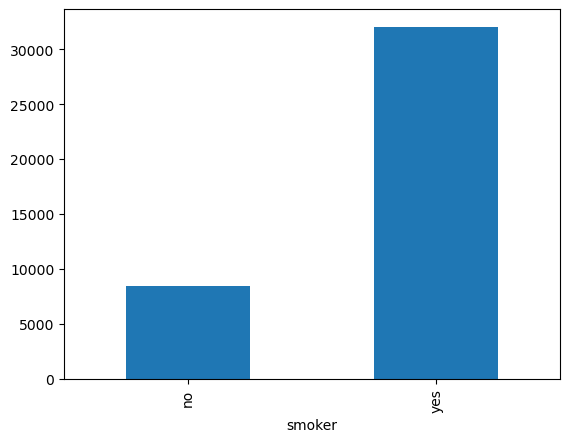

In [58]:
insurance.groupby("smoker")["charges"].mean().plot.bar()

### Feature-Feature Relationships

<Axes: xlabel='age', ylabel='bmi'>

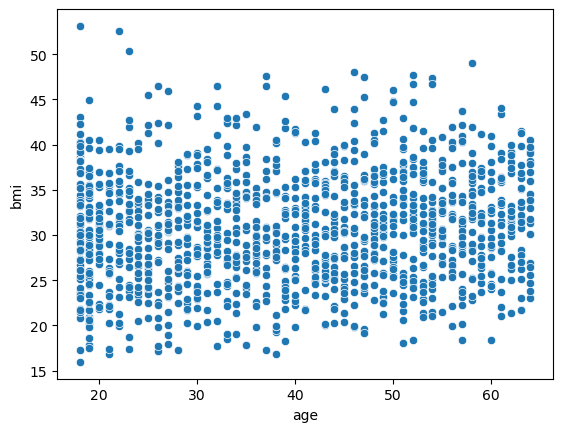

In [59]:
sns.scatterplot(insurance, x="age", y="bmi")

<Axes: xlabel='smoker'>

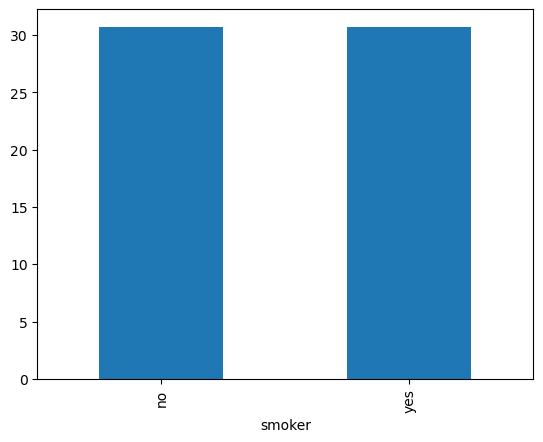

In [61]:
insurance.groupby("smoker")["bmi"].mean().plot.bar()

### Pairplots & LMPlots

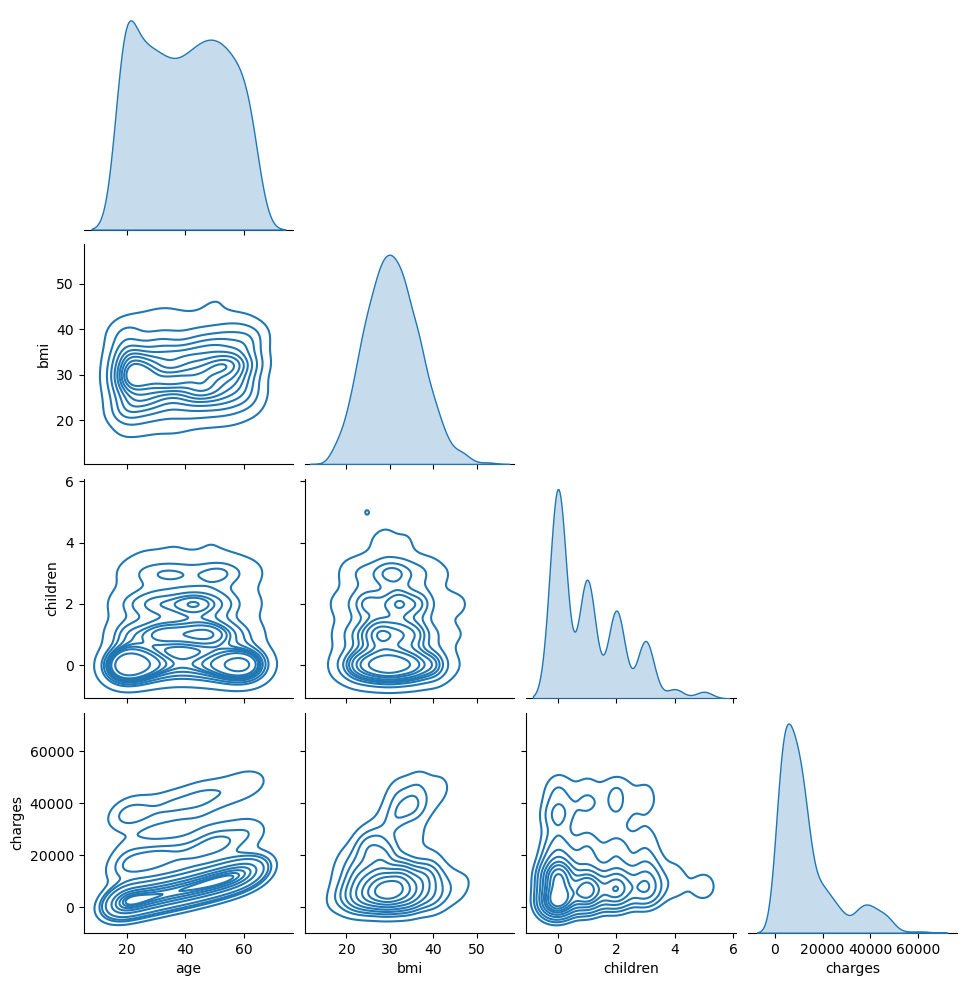

In [71]:
sns.pairplot(insurance, corner=True, kind="kde")

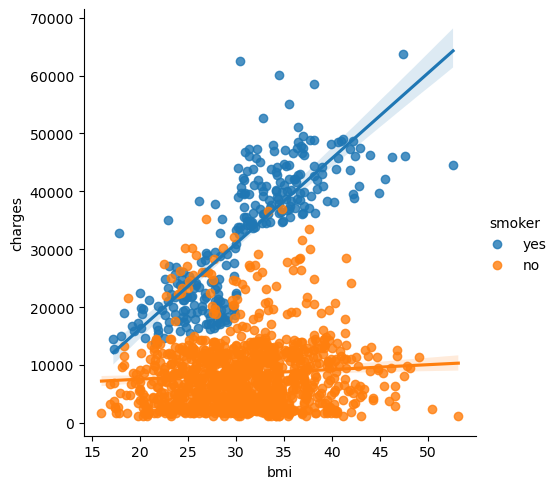

In [74]:
sns.lmplot(insurance, x="bmi", y="charges", hue="smoker")